<a href="https://colab.research.google.com/github/KerryLei/Propeller/blob/main/PropellerQ1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
pip install dmba

     |████████████████████████████████| 11.8 MB 6.6 MB/s 


In [43]:
import pandas as pd
from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_val_score,StratifiedKFold,GridSearchCV
from sklearn.metrics import confusion_matrix, roc_auc_score
import statsmodels.api as sm
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
from dmba import plotDecisionTree, classificationSummary, regressionSummary
from sklearn.linear_model import LogisticRegression

In [ ]:
aid = pd.read_csv('/content/drive/MyDrive/Propeller/asthma_id.csv', index_col = 0)
r = pd.read_csv('/content/drive/MyDrive/Propeller/rescue_med.csv', index_col = 0)
c = pd.read_csv('/content/drive/MyDrive/Propeller/controller_med.csv', index_col = 0)

In [3]:
events = pd.read_csv('/content/drive/MyDrive/Propeller/New datasets/events.csv', index_col = 0)
#kpi = pd.read_csv('/content/drive/MyDrive/Propeller/kpi_split/daily_patient_kpi_newid0.csv')

In [9]:
a_e = events.iloc[:,10:]
a_e = a_e.dropna(subset=a_e.iloc[:,:-5].columns)
X = a_e.iloc[:,:-5]
Y = a_e['type']
y_true = 1 - pd.factorize(Y)[0]

In [10]:
dt = DecisionTreeClassifier(max_depth=3,class_weight='balanced').fit(X,Y)
y_pred = dt.predict(X)

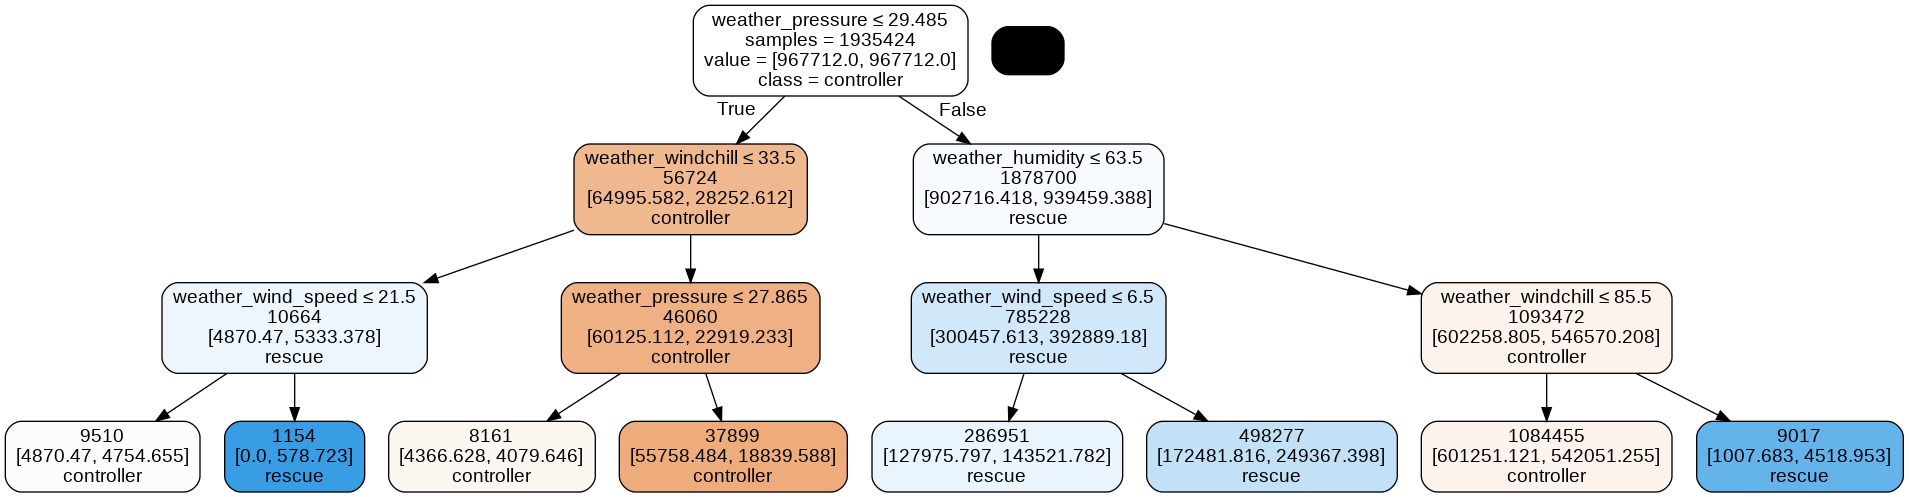

In [11]:
plotDecisionTree(dt, feature_names=X.columns, class_names=dt.classes_)

In [38]:
rf = RandomForestClassifier(n_estimators=50,max_depth=3,class_weight='balanced',bootstrap=False).fit(X,y_true)
y_pred_rf = rf.predict(X)  #0.5574402716336676

In [ ]:
i = 0
for e in rf.estimators_:
  y_pred = e.predict(X)
  if roc_auc_score(y_true,y_pred) > i:
      i = roc_auc_score(y_true,y_pred)
      E = e

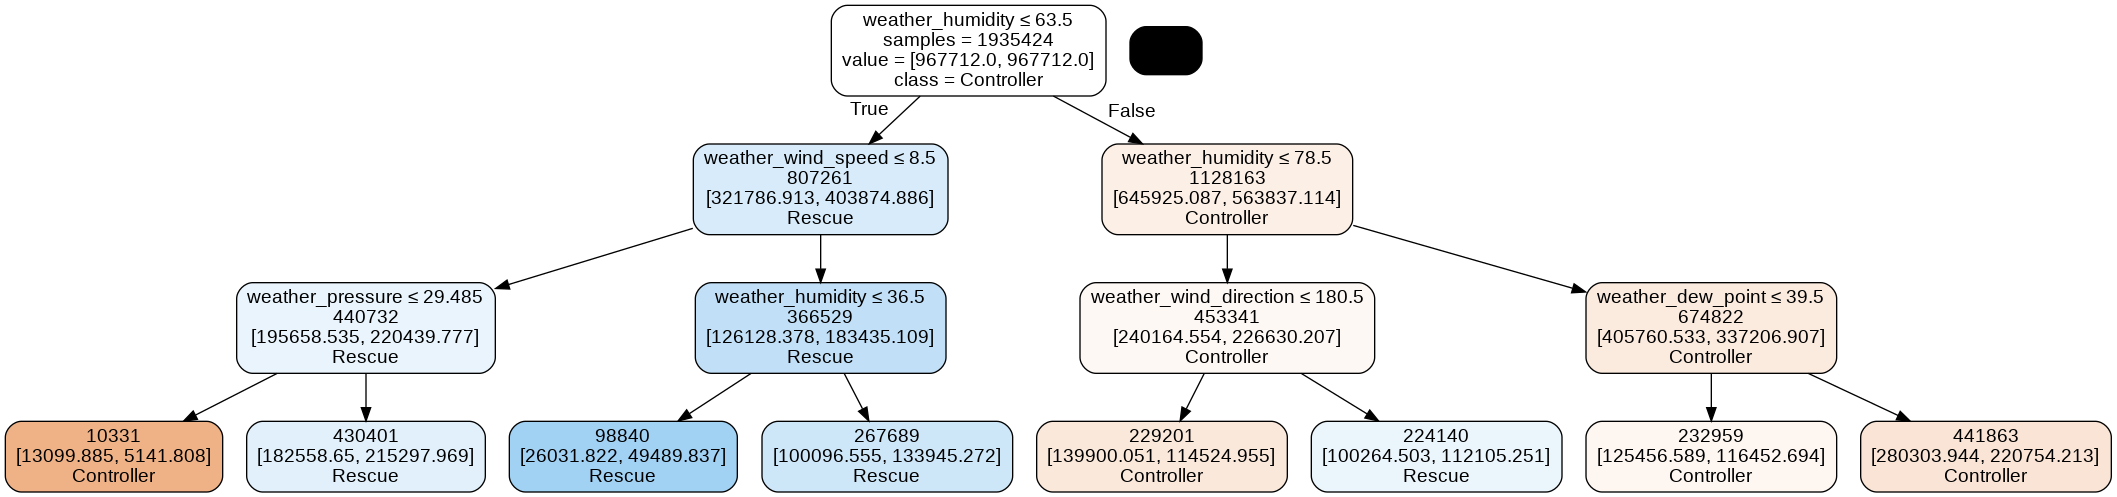

In [42]:
plotDecisionTree(E, feature_names=X.columns, class_names=['Controller','Rescue'])

In [44]:
lg = LogisticRegression(class_weight='balanced').fit(X,y_true)
y_pred_lg = lg.predict(X)  #0.5457432307528072

In [47]:
smlog = sm.Logit(y_true,sm.add_constant(X)).fit()
smlog.summary()

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


Optimization terminated successfully.
         Current function value: 0.020212
         Iterations 10


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                      y   No. Observations:              1935424
Model:                          Logit   Df Residuals:                  1935415
Method:                           MLE   Df Model:                            8
Date:                Fri, 25 Mar 2022   Pseudo R-squ.:                0.003837
Time:                        04:53:00   Log-Likelihood:                -39119.
converged:                       True   LL-Null:                       -39270.
Covariance Type:            nonrobust   LLR p-value:                 2.122e-60
==========================================================================================
                             coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                      3.7489      0.437      8.583      0.000       2.893       4.605
weather_dew_point         -0.0149      0.005     -2.954      0.003      -0.025      -0.005
weather_heat_index         0.0379      0.008      4.789      0.000       0.022       0.053
weather_humidity          -0.0005      0.002     -0.228      0.820      -0.005       0.004
weather_pressure           0.0609      0.012      4.967      0.000       0.037       0.085
weather_temp              -0.0301      0.011     -2.770      0.006      -0.051      -0.009
weather_wind_direction     0.0005      0.000      4.185      0.000       0.000       0.001
weather_wind_speed         0.0158      0.003      4.540      0.000       0.009       0.023
weather_windchill          0.0049      0.006      0.789      0.430      -0.007       0.017
==========================================================================================
"""